In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("files/weather.csv", parse_dates=True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [3]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [4]:
sub_data = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
           'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
           'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
           'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainTomorrow']]
sub_data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RISK_MM          float64
RainTomorrow      object
dtype: object

In [5]:
sub_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.6,Yes


In [6]:
sub_data = sub_data.drop("WindGustSpeed", axis=1)

In [7]:
sub_data.dtypes

MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
WindSpeed9am    float64
WindSpeed3pm    float64
Humidity9am     float64
Humidity3pm     float64
Pressure9am     float64
Pressure3pm     float64
Cloud9am        float64
Cloud3pm        float64
Temp9am         float64
Temp3pm         float64
RISK_MM         float64
RainTomorrow     object
dtype: object

In [8]:
sub_data_clean = sub_data.dropna()

In [9]:
sub_data_clean.isnull().any()

MinTemp         False
MaxTemp         False
Rainfall        False
Evaporation     False
Sunshine        False
WindSpeed9am    False
WindSpeed3pm    False
Humidity9am     False
Humidity3pm     False
Pressure9am     False
Pressure3pm     False
Cloud9am        False
Cloud3pm        False
Temp9am         False
Temp3pm         False
RISK_MM         False
RainTomorrow    False
dtype: bool

In [10]:
X = sub_data_clean.iloc[:, :-1]
y = sub_data_clean['RainTomorrow']
y = np.array([0 if value == "No" else 1 for value in y])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [12]:
clp = Perceptron()
clp.fit(X_train, y_train)
y_pred = clp.predict(X_test)
accuracy_score(y_test, y_pred)

0.8290468986384266

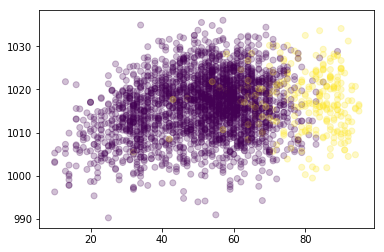

In [15]:
fig, ax = plt.subplots()
y_pred = clp.predict(X)
ax.scatter(x=X['Humidity3pm'], y=X['Pressure3pm'], c= y_pred, alpha=.25)